In [11]:
%matplotlib inline
import numpy as np
np.set_printoptions(linewidth=np.inf)
np.set_printoptions(precision=3)
import matplotlib.pyplot as plt
import math 
import pandas as pd
from numpy import linalg as LA
from sympy import * 
from typing import List, Dict, Iterable, Tuple, Callable
from matplotlib import pyplot as plt
from collections import Counter
# import pygal
import sys
import os
import string
import urllib.request
import requests
import curl
import pycurl
import webbrowser
import numpy as np
#import mypy
import math
import pandas as pd
# from IPython import qt
from matplotlib.pyplot import figure
from py.xml import raw
from requests.api import get

In [12]:
# Imports dataset
dataset = pd.read_csv('cadairydata.csv')

# Count rows & columns
row_data, col_data = dataset.shape


In [13]:
# Create Input & Output arrays

# Create output values
y = []
for i in range(0,row_data):
    y.append(dataset.iloc[i,7])

# Create input values
len_Jan = len(y)
t = list(range(0,len_Jan))
# actual_x = x


In [14]:
# Normalize input array
# Mean
meanX = np.mean(t, axis=0)
# print("Mean: ", meanX)
# meanY = np.mean(y_Jan, axis=0)
# Standard Deviation
stdX = np.std(t, axis = 0)
# print("Std Dev: ", stdX)
# t = (t- meanX) / stdX
# Variance
varY = np.var(y)
# print("Variance: ", varY)
# Array lengths
leng = len(t)

In [15]:
# Initial Guesses
# guess_cnt = 0.01
x1 = 1.5
x2 = 1.5
x3 = 1.1
x4 = 1.08
# x5 = 1.0 * guess_cnt
lambda1 = 0.01
# Tolerance
tol = 1e-1
tolerance = []
# Iterations
iter = 0
iterations = []
# iterations.append(iter)
# Coefficients
coeff = []
# Error
err_1 = []
err_0 = []


In [16]:
while tol > 1e-8 and iter < 20:
    # Number of iterations
    iterations.append(iter)
    iter = iter + 1

    # Initial Guess
    # Test
    Y_test_0 = []
    for i in range(0, leng):
        y0 = x1 * t[i] ** 2 + x2 * t[i] + x3
        Y_test_0.append(y0)

    # Error
    Y_err_0 = np.array(y) - np.array(Y_test_0)
    err0 = np.dot(Y_err_0, Y_err_0)
    err_0.append(err0)

    #%%
    # Setup Equations
    # Intialize Array
    F = []

    # Vector valued function
    for i in range(0,leng):
        # f = (x1 * math.exp(x2 * t[i])) - y[i]
        f = (x1 * t[i] ** 2 + x2 * t[i] ** 1 + x3 + (0 * np.sin(t[i]))) - y[i]
        # f = (x1 * t[i] ** 3 + x2 * t[i] ** 2 + x3 * t[i] + x4 ) - y[i]
        F.append(f)
    # Convert to Array
    F = np.matrix(F)

    # # Hessian
    # # Initialize matrix
    # mat_1 = np.ones((4,leng))
    mat_1 = np.ones((3,leng))

    # First Row
    for i in range(0,leng):
        mat_1[0][i] = t[i] ** 2
    # Second Row
    for i in range(0,leng):
        mat_1[1][i] = t[i] ** 1

    #%%
    # Calculations
    F_delta = np.matmul(F,mat_1.T)

    # # Gradient
    F_delta_1 = np.matmul(mat_1, mat_1.T)

    # Solve coefficients p
    # Gradient inverse
    F_delta_1_inv = np.linalg.pinv(F_delta_1)

    # Levenberg-Marquardt
    F_delta_2 = F_delta_1 + lambda1 * lambda1 * np.identity(3)

    #%%
    # Solve coefficients p
    # Gradient inverse
    # F_delta_1_inv = np.linalg.pinv(F_delta_1)
    F_delta_2_inv = np.linalg.pinv(F_delta_2)

    # Solve for p
    # p = np.matmul(-F_delta, F_delta_1_inv)
    p = np.matmul(-F_delta, F_delta_2_inv)

    # Convert to list
    p_list = p.tolist()
    p_list = p_list[0]
    coeff.append(p_list[0])

    # Update guesses
    x1 = x1 + p_list[0]
    x2 = x2 + p_list[1]
    x3 = x3 + p_list[2]

    # Calculate new tolerance
    # tol = abs(p_list[0])
    tol1 = abs(np.sum(F_delta))
    tol = np.square(tol1)

    Y_test_1 = []
    for i in range(0,leng):
    # f = (x1 * math.exp(x2 * t[i])) - y[i]
        f = (x1 * t[i] ** 2) + x2 * t[i] + x3
    # f = (x1 * t[i] ** 3 + x2 * t[i] ** 2 + x3 * t[i] + x4 ) - y[i]
        Y_test_1.append(f)

    # Error
    Y_err_1 = np.array(y) - np.array(Y_test_1)
    Y_err_1_sq = np.square(Y_err_1)
    sse = np.sum(Y_err_1_sq)
    tol = sse
    err1 = np.dot(Y_err_1, Y_err_1)
    err_1.append(err1)
    tolerance.append(tol)

    if err1 < err0:
        lambda1 = lambda1 / 10
    else:
        lambda1 = lambda1 * 10

    # Difference in errors
    diff = abs(err1 - err0)
    if diff < 1e-10:
        iter -= 1
        break


In [17]:
# Creating variables to plot trends and NLLS models
Y = []
Y_trend = []
tt = list(range(0,324))
for i in range(0, 324):
    # y0 = x1 * np.exp(x2 * t[i])
    y0 = (x1 * (tt[i] ** 2)) + (x2 * (tt[i] ** 1)) + x3
    # y0 = (x1 * (t[i] ** 3)) + (x2 * (t[i] ** 2)) + (x3 * t[i]) + x4
    y1 = np.sum(np.random.randn(4)) * (varY ** 2) + y0
    # y1 = y0 * (varY ** 2) + meanX
    Y.append(y1)
    Y_trend.append(y0)

print(iter)
print("Tolerance: ", tol)
print("Differance: ", diff)

# Random Number
# print(np.random.randn(1))


2
Tolerance:  3.730724668940846
Differance:  1.3322676295501878e-15


In [18]:
# Maximum trend
max_trend = np.max(t)

In [19]:
#%%
# Errors
# Initialize error array
error = []
for i in range(0,len(y)):
    pred_error = Y_trend[i]
    actual_error = y[i]
    err = pred_error - actual_error
    error.append(err)

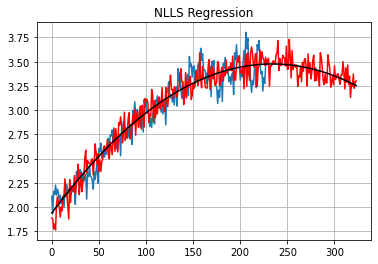

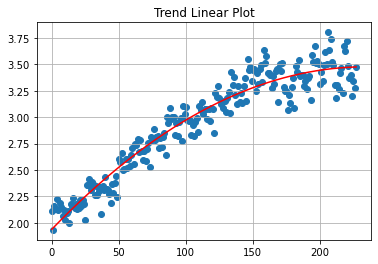

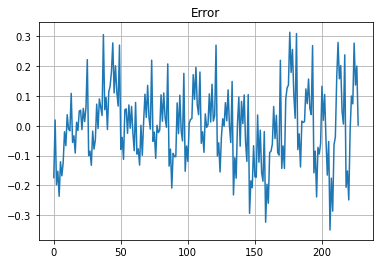

In [20]:
# Plots

# Trend plots
plot1 = plt.figure(1)
plt.plot(t,y)
plt.plot(tt,Y, 'r')
plt.plot(tt,Y_trend, 'black')
# Displaying the title
plt.title("NLLS Regression")
plt.grid()

# Scatter plot
plot3 = plt.figure(2)
plt.scatter(t,y)
plt.plot(t,Y_trend[0:max_trend+1], color="Red")
# Displaying the title
plt.title("Trend Linear Plot")
plt.grid()

# Error plot
plot3 = plt.figure(3)
plt.plot(error)
# Displaying the title
plt.title("Error")
plt.grid()

# Show plots
plt.show()